In [1]:
import pandas as pd
df_sales = pd.read_csv('florist-order-record.csv')
df_sales.head()

,Order,ProductID,Date,Products,Number,Price,UserID,City
0,536374,21258,6/1/2020 9:09,Five Colorful Roses,32,10.95,15100,Beijing
1,536376,22114,6/1/2020 9:32,25 White Jasmine,48,3.45,15291,Shanghai
2,536376,21733,6/1/2020 9:32,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai
3,536378,22386,6/1/2020 9:37,Lily Pink,10,1.95,14688,Beijing
4,536378,85099C,6/1/2020 9:37,Champagne Carnation,10,1.95,14688,Beijing


In [2]:
city = pd.get_dummies(df_sales.City, prefix='City')
df_sales = pd.concat([df_sales, city], axis=1)
df_sales

,Order,ProductID,Date,Products,Number,Price,UserID,City,City_Beijing,City_Chendu,City_Guangzhou,City_Shanghai,City_Shenzhen,City_Suzhou,City_Xi'an
0,536374,21258,6/1/2020 9:09,Five Colorful Roses,32,10.95,15100,Beijing,1,0,0,0,0,0,0
1,536376,22114,6/1/2020 9:32,25 White Jasmine,48,3.45,15291,Shanghai,0,0,0,1,0,0,0
2,536376,21733,6/1/2020 9:32,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai,0,0,0,1,0,0,0
3,536378,22386,6/1/2020 9:37,Lily Pink,10,1.95,14688,Beijing,1,0,0,0,0,0,0
4,536378,85099C,6/1/2020 9:37,Champagne Carnation,10,1.95,14688,Beijing,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87175,581585,21684,6/9/2021 12:31,Product Description Mask,12,5.00,15804,Shenzhen,0,0,0,0,1,0,0
87176,581585,22398,6/9/2021 12:31,Product Description Mask,12,499.00,15804,Shenzhen,0,0,0,0,1,0,0
87177,581585,23328,6/9/2021 12:31,Product Description Mask,4,58.00,15804,Shenzhen,0,0,0,0,1,0,0
87178,581585,23145,6/9/2021 12:31,Product Description Mask,12,88.90,15804,Shenzhen,0,0,0,0,1,0,0


In [3]:
df_sales = pd.read_csv('florist-order-record.csv')
print('Date Range: %s ~ %s' % (df_sales['Date'].min(), df_sales['Date'].max()))
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
print('Date Range Change: %s ~ %s' % (df_sales['Date'].min(), df_sales['Date'].max()))

Date Range: 1/1/2021 10:11 ~ 9/9/2020 9:20
Date Range Change: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [4]:
df_sales = df_sales.loc[df_sales['Date'] < '2021-06-01']
print('Date Range Delete: %s ~ %s' % (df_sales['Date'].min(), df_sales['Date'].max()))

Date Range Delete: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


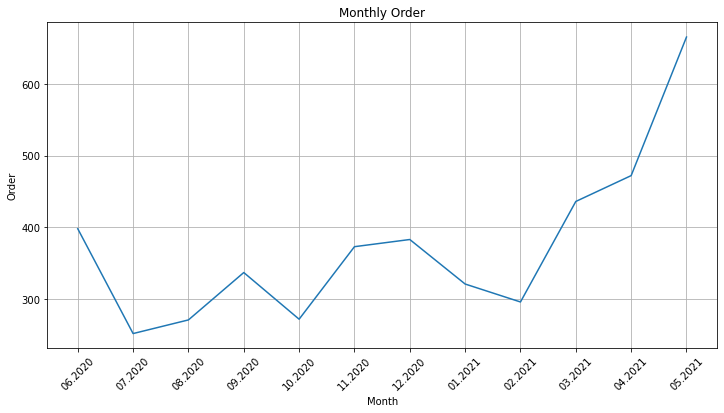

In [5]:
import matplotlib.pyplot as plt
df_orders_monthly = df_sales.set_index('Date')['Order'].resample('M').nunique()
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Order')
ax.set_title('Monthly Order')
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show()

In [6]:
df_sales = df_sales.drop_duplicates()

In [7]:
df_sales['Total'] = df_sales['Number'] * df_sales['Price']
df_sales.head()

,Order,ProductID,Date,Products,Number,Price,UserID,City,Total
0,536374,21258,2020-06-01 09:09:00,Five Colorful Roses,32,10.95,15100,Beijing,350.4
1,536376,22114,2020-06-01 09:32:00,25 White Jasmine,48,3.45,15291,Shanghai,165.6
2,536376,21733,2020-06-01 09:32:00,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai,163.2
3,536378,22386,2020-06-01 09:37:00,Lily Pink,10,1.95,14688,Beijing,19.5
4,536378,85099C,2020-06-01 09:37:00,Champagne Carnation,10,1.95,14688,Beijing,19.5


In [8]:
df_sales_3m = df_sales[(df_sales.Date > '2020-06-01') & (df_sales.Date <= '2020-08-30')]
df_sales_3m.reset_index(drop=True)

,Order,ProductID,Date,Products,Number,Price,UserID,City,Total
0,536374,21258,2020-06-01 09:09:00,Five Colorful Roses,32,10.95,15100,Beijing,350.40
1,536376,22114,2020-06-01 09:32:00,25 White Jasmine,48,3.45,15291,Shanghai,165.60
2,536376,21733,2020-06-01 09:32:00,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai,163.20
3,536378,22386,2020-06-01 09:37:00,Lily Pink,10,1.95,14688,Beijing,19.50
4,536378,85099C,2020-06-01 09:37:00,Champagne Carnation,10,1.95,14688,Beijing,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,Product Description Mask,6,18.00,15656,Suzhou,108.00
14565,545190,22722,2020-08-29 15:32:00,Product Description Mask,4,39.50,15656,Suzhou,158.00
14566,545190,22457,2020-08-29 15:32:00,Product Description Mask,60,3.00,15656,Suzhou,180.00
14567,545190,22464,2020-08-29 15:32:00,Product Description Mask,12,25.00,15656,Suzhou,300.00


In [9]:
df_user = pd.DataFrame(df_sales['UserID'].unique())
df_user.columns = ['UserID']
df_user.head()
df_R_value = df_sales_3m.groupby('UserID').Date.max().reset_index()
df_R_value.columns = ['UserID','LastDate']
df_R_value['Recency'] = (df_R_value['LastDate'].max() - df_R_value['LastDate']).dt.days
df_user = pd.merge(df_user, df_R_value[['UserID','Recency']], on='UserID')
df_F_value = df_sales_3m.groupby('UserID').Date.count().reset_index()
df_F_value.columns = ['UserID','Frequency']
df_user = pd.merge(df_user, df_F_value[['UserID','Frequency']], on='UserID')
df_M_value = df_sales_3m.groupby('UserID').Total.sum().reset_index()
df_M_value.columns = ['UserID','Monetary']
df_user = pd.merge(df_user, df_M_value, on='UserID')
df_user

,UserID,Recency,Frequency,Monetary
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


In [10]:
df_user_1y = df_sales.groupby('UserID')['Total'].sum().reset_index()
df_user_1y.columns = ['UserID','YearlyLTV'] 
df_user_1y.head() 
df_LTV = pd.merge(df_user, df_user_1y, on='UserID', how='left')
df_LTV

,UserID,Recency,Frequency,Monetary,YearlyLTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


In [11]:
X = df_LTV.drop(['UserID','YearlyLTV'],axis=1)
X.head()

,Recency,Frequency,Monetary
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [12]:
y = df_LTV['YearlyLTV']
y.head()

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: YearlyLTV, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 36)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 36)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_lr = LinearRegression()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [15]:
model_lr.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
y_valid_preds_lr = model_lr.predict(X_valid)
y_valid_preds_dtr = model_dtr.predict(X_valid)
y_valid_preds_rfr = model_rfr.predict(X_valid)

In [17]:
X_valid.iloc[2]

Recency         1.00
Frequency     153.00
Monetary     1413.83
Name: 163, dtype: float64

In [18]:
print('True Value:', y_valid.iloc[2])
print('Linear Regression Prediction:', y_valid_preds_lr[2])
print('Decision Tree Prediction:', y_valid_preds_dtr[2])
print('Random Forest Prediction:', y_valid_preds_rfr[2])

True Value: 4391.94
Linear Regression Prediction: 7549.228946781505
Decision Tree Prediction: 7904.28
Random Forest Prediction: 4538.415500000002


In [19]:
from sklearn.metrics import r2_score,   median_absolute_error
print('Linear Regression: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('Decision Tree: %0.4f' % r2_score(y_valid, model_dtr.predict(X_valid)))
print('Random Forest: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))

Linear Regression: 0.4333
Decision Tree: 0.0707
Random Forest: 0.4958


In [20]:
y_test_preds_rfr = model_rfr.predict(X_test)

Text(0.5, 1.0, 'Actual vs. Predict')

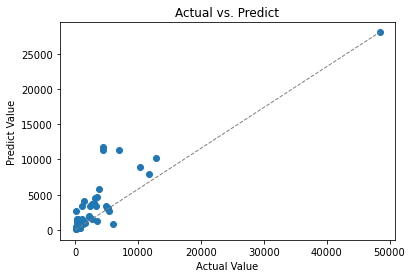

In [21]:
plt.scatter(y_test, y_test_preds_rfr)
plt.plot([0, max(y_test)], [0, max(y_test_preds_rfr)],   color='gray', lw=1, linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')
plt.title('Actual vs. Predict')

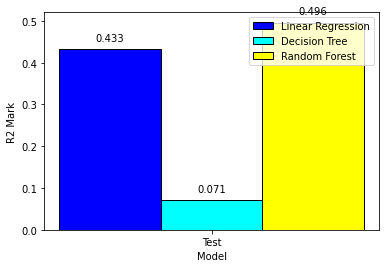

In [22]:
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i/50+x[i], round(y[i], 3)+0.02, round(y[i], 3), ha = 'center')

fig, ax = plt.subplots()    

width = 0.25

bars1 = [r2_score(y_valid, model_lr.predict(X_valid))]
bars2 = [r2_score(y_valid, model_dtr.predict(X_valid))]
bars3 = [r2_score(y_valid, model_rfr.predict(X_valid))]

r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]

plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='Linear Regression')

plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='Decision Tree')

plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='Random Forest')

plt.xticks([r + width for r in range(len(bars1))], ['Test'])
plt.ylabel('R2 Mark')
plt.xlabel('Model')
plt.legend()

addlabels(r1, bars1)
addlabels(r2, bars2)
addlabels(r3, bars3)

plt.show()